# Parameter Uncertainty

Now let's try determining some uncertainties on parameters using MCs.

Why can we use MC to determine uncertainty? MC offers a way of sampling from a distribution. Imagine we have a distribution of values, our best fit (the value which comes up most often) but also a full range of other pretty decent values which could describe our data. We therefore have a $\textit{distribution}$ of values which can describe our data. We can get an empirical sample of those by sampling from that distribution.

In order to examine how to do a paremter uncertainty estimate using MC we need to generate some data and fit it with a model. We will then be asking what is the uncertainty on our model parameters?

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal
import corner

## First let's make some model data to fit

Let's just make data from a straight line $\textit{but}$ we are going to make it such that there is some $\textit{intrinsic scatter}$ such that the uncertainties that are reported do not reflect the true variation in the data. Essentially there is additional variance in the data.

We will use this notation:

$y = m x + b$

$y_{err}$ = errors on y but these are underestimated by some amount

$f$ = some fractional amount that the errors are underestimated by

Text(0, 0.5, 'y')

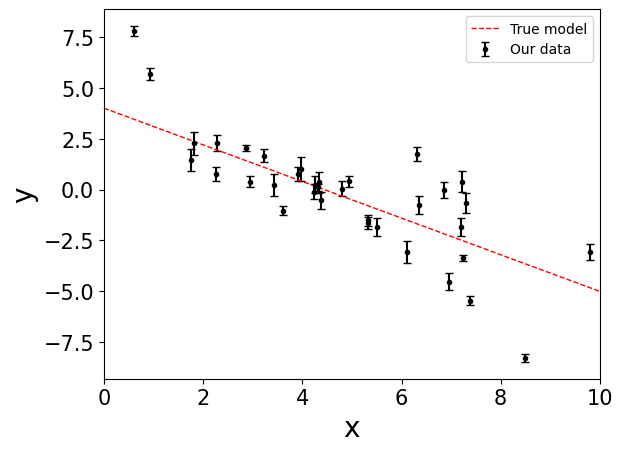

In [3]:
# Setting a seed - what does this do?
np.random.seed(123)

# The "true" parameters.
m_true = -0.9
b_true = 4.0
f_true = 0.9 

# Generate some synthetic data from the model.
N = 35 # number of data points to generate
x = np.sort(10 * np.random.rand(N)) # randomly generate x
yerr = 0.1 + 0.5 * np.random.rand(N) # randomy generate yerr
y = m_true * x + b_true # y = m*x + b
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

# plotting this data
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=3,label='Our data')

# plotting the model we drew the mock data from
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "r--", alpha=1.0, lw=1, label='True model')

# Always remember to apropriately label your plots!
plt.legend()
plt.xlim(0, 10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)

Above we see our data and model that allowed us to generate our mock data.

$\textbf{Note: Always remember to label all your plots correctly (readable x and y labels, readable tick marks, labels if needed)}$

Let's fit our data with a model. Let's assume this is a good model and use MC to find the uncertainty on the parameters.
 $$y = mx+b$$

Write a function model() for our model above:

We will use scipy.optimize.curvefit to find a best fit of this model to the data. 

Import the relevant command here:

Fit the data using curve_fit:

Plot
1. Our data
2. The True model
3. The Best fit model from curvefit
Make sure the plot is correctly labeled and readable

Great! So the best fit model looks pretty good $\textit{but}$ what $\textit{range}$ of parameters would be a good fit to this data?

We will assess this by simulating the dataset many times (a montecarlo method):
   
   1. Generate a large number of datasets - nTrials=5000
   2. Refit these to find the range of parameters that fit our data
    
You should end up with an array of the fit parameters which has the dimensions (nTrials, 2) as you have 2 parameters in your model (m and b).

In [4]:
nTrials = 

SyntaxError: invalid syntax (2959444127.py, line 1)

In [5]:
aFitPars = np.array([]) # array of fit parameters
initial_guess = [-1.0,3.0]
for iTrial in range(nTrials):
    
    # Generate the data
    # Fit the model
    # Store the parameters
    
    
        

IndentationError: expected an indented block (1027857745.py, line 10)

Make sure the shape of aFitPars is (nTrials,2)

What are the median and std dievation of the parameters that you have fit?

Plot a histogram of each parameter, as two subplots inside a plot hint use plt.subplot(), and draw a line at the $16^{th}$, $50^{th}$ and $84^{th}$ percentile. What is special about these values?

What would you report as the best fit parameter value and it's 1 $\sigma$ uncertainties?

Now the histograms of the distibution of parameters which fit the data well both look pretty gaussian except for some long tails in their 1D distributions. How do they vary with each other? Do the parameters depend on each other?

Plot these m's against these b's and see if they have any correlation with each other - that is, if they $\textit{co-vary}$

There is definitely some correlation in the parameter values. A high value of a corresponds to a lower value of b. We sometimes show these two plots (the histogram and scatter plot) as a $\textit{corner plot}$. An example is provided with the code below.

Read up on the help for this corner plot - what does the 'levels' command do?

In [6]:
fig=corner.corner(aFitPars, labels=[r"$a$", r"$b$"], quantiles=[0.16, 0.5, 0.84], levels=(1-np.exp(-0.5),), show_titles=True, title_kwargs={"fontsize": 15}, smooth=True)

NameError: name 'aFitPars' is not defined

So monte carlo methods are basically just a means of simulating the distribution of parameters in order to gain an empirical understanding of the properties of that distribution such as understanding the summary statistics like the 'most common' value (the median), or the 'expectation' (the mean) or the spread of the data (the variance which is equal to the std dievation squared).

Let's think about this in another way:

The expectation of f(x )can be written
$$E[x]=\int x f(x) dx$$
This sort of integrale can be difficult to solve analyticaly. But if we can draw samples of $x$ then we have:
$$E[x]\approx \frac{1}{N} \sum f(x)$$
Which is a lot easier especially with a computer! The more samples we draw the closer we get to the real result.